#📌 Extracão

In [150]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white", palette="Set2")

In [151]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
dados_json = requests.get(url).json()
df = pd.json_normalize(dados_json)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [152]:
print("--- Informações do DataFrame ---")
df.info()



--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSu

In [153]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
nulos_encontrados = df['account.Charges.Total'].isnull().sum()
print(f"Valores nulos encontrados após a conversão: {nulos_encontrados}")

Valores nulos encontrados após a conversão: 11


In [154]:
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
df['account.Charges.Total'].dtype

dtype('float64')

In [155]:
# verificando se há algum id duplicado antes de excluir a coluna id
duplicados = df.duplicated(subset=['customerID']).sum()
print(f"Quantidade de clientes duplicados: {duplicados}")

Quantidade de clientes duplicados: 0


In [156]:
df.drop(columns=['customerID'], inplace=True)
df

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [157]:
df.columns = df.columns.str.replace('.', '_')
print("✅ Nomes das colunas padronizados!")
df.columns


✅ Nomes das colunas padronizados!


Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [158]:
print("\n--- Contagem de Valores Nulos ---")
display(df.isnull().sum())

print("\n--- Valores Únicos nas Colunas Categóricas ---")
colunas_texto = df.select_dtypes(include=['object']).columns

for coluna in colunas_texto:
    valores_unicos = df[coluna].unique()
    print(f"{coluna}: {valores_unicos}")


--- Contagem de Valores Nulos ---


,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0



--- Valores Únicos nas Colunas Categóricas ---
Churn: ['No' 'Yes' '']
customer_gender: ['Female' 'Male']
customer_Partner: ['Yes' 'No']
customer_Dependents: ['Yes' 'No']
phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: ['Yes' 'No']
account_PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [159]:
if 'phone_MultipleLines' in df.columns:
    df['phone_MultipleLines'] = df['phone_MultipleLines'].replace('No phone service', 'No')

colunas_internet = [
    'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

for coluna in colunas_internet:
    if coluna in df.columns:
        df[coluna] = df[coluna].replace('No internet service', 'No')

print("\n--- Valores Únicos nas Colunas de Serviço de Internet após substituição ---")
for coluna in colunas_internet:
    if coluna in df.columns:
        print(f"{coluna}: {df[coluna].unique()}")


--- Valores Únicos nas Colunas de Serviço de Internet após substituição ---
internet_OnlineSecurity: ['No' 'Yes']
internet_OnlineBackup: ['Yes' 'No']
internet_DeviceProtection: ['No' 'Yes']
internet_TechSupport: ['Yes' 'No']
internet_StreamingTV: ['Yes' 'No']
internet_StreamingMovies: ['No' 'Yes']


In [160]:
df['Contas_Diarias'] = (df['account_Charges_Monthly'] / 30).round(2)

display(df[['account_Charges_Monthly', 'Contas_Diarias']].head())

,account_Charges_Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [161]:
df

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [162]:
colunas_traduzidas = {
    'Churn': 'Evasão',
    'customer_gender': 'Gênero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Parceiro',
    'customer_Dependents': 'Dependentes',
    'customer_tenure': 'Meses na Empresa',
    'phone_PhoneService': 'Serviço de Telefone',
    'phone_MultipleLines': 'Múltiplas Linhas',
    'internet_InternetService': 'Serviço de Internet',
    'internet_OnlineSecurity': 'Segurança Online',
    'internet_OnlineBackup': 'Backup Online',
    'internet_DeviceProtection': 'Proteção Dispositivo',
    'internet_TechSupport': 'Suporte Técnico',
    'internet_StreamingTV': 'Streaming TV',
    'internet_StreamingMovies': 'Streaming Filmes',
    'account_Contract': 'Tipo de Contrato',
    'account_PaperlessBilling': 'Fatura Digital',
    'account_PaymentMethod': 'Método de Pagamento',
    'account_Charges_Monthly': 'Valor Mensal',
    'account_Charges_Total': 'Valor Total',
    'Contas_Diarias': 'Valor por dia'
}

df = df.rename(columns=colunas_traduzidas)

traducoes_valores = {
    'Yes': 'Sim',
    'No': 'Nao',
    'Female': 'Feminino',
    'Male': 'Masculino',
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bianual',
    'Fiber optic': 'Fibra otica',
    'Electronic check': 'Cheque eletrônico',
    'Mailed check': 'Cheque por correio',
    'Bank transfer (automatic)': 'Transferência bancária (automática)',
    'Credit card (automatic)': 'Cartão de crédito (automático)'
}

df = df.replace(traducoes_valores)
df = df.replace({'Sim': 1, 'Nao': 0})
df

/tmp/ipython-input-1118/2913594546.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Sim': 1, 'Nao': 0})


,Evasão,Gênero,Idoso,Parceiro,Dependentes,Meses na Empresa,Serviço de Telefone,Múltiplas Linhas,Serviço de Internet,Segurança Online,...,Proteção Dispositivo,Suporte Técnico,Streaming TV,Streaming Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Valor Mensal,Valor Total,Valor por dia
0,0,Feminino,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque por correio,65.60,593.30,2.19
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensal,0,Cheque por correio,59.90,542.40,2.00
2,1,Masculino,0,0,0,4,1,0,Fibra otica,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,73.90,280.85,2.46
3,1,Masculino,1,1,0,13,1,0,Fibra otica,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,98.00,1237.85,3.27
4,1,Feminino,1,1,0,3,1,0,Fibra otica,0,...,0,1,1,0,Mensal,1,Cheque por correio,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Feminino,0,0,0,13,1,0,DSL,1,...,0,1,0,0,Anual,0,Cheque por correio,55.15,742.90,1.84
7263,1,Masculino,0,1,0,22,1,1,Fibra otica,0,...,0,0,0,1,Mensal,1,Cheque eletrônico,85.10,1873.70,2.84
7264,0,Masculino,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Mensal,1,Cheque por correio,50.30,92.75,1.68
7265,0,Masculino,0,1,1,67,1,0,DSL,1,...,1,1,0,1,Bianual,0,Cheque por correio,67.85,4627.65,2.26


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Evasão                7267 non-null   object 
 1   Gênero                7267 non-null   object 
 2   Idoso                 7267 non-null   int64  
 3   Parceiro              7267 non-null   int64  
 4   Dependentes           7267 non-null   int64  
 5   Meses na Empresa      7267 non-null   int64  
 6   Serviço de Telefone   7267 non-null   int64  
 7   Múltiplas Linhas      7267 non-null   int64  
 8   Serviço de Internet   7267 non-null   object 
 9   Segurança Online      7267 non-null   int64  
 10  Backup Online         7267 non-null   int64  
 11  Proteção Dispositivo  7267 non-null   int64  
 12  Suporte Técnico       7267 non-null   int64  
 13  Streaming TV          7267 non-null   int64  
 14  Streaming Filmes      7267 non-null   int64  
 15  Tipo de Contrato     

#📊 Carga e análise

In [164]:
display(df.describe())

,Idoso,Parceiro,Dependentes,Meses na Empresa,Serviço de Telefone,Múltiplas Linhas,Segurança Online,Backup Online,Proteção Dispositivo,Suporte Técnico,Streaming TV,Streaming Filmes,Fatura Digital,Valor Mensal,Valor Total,Valor por dia
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157292
std,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.340000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [165]:
limites = [0, 12, 24, 36, 48, 60, 100]
rotulos = ['0-1 Ano', '1-2 Anos', '2-3 Anos', '3-4 Anos', '4-5 Anos', 'Mais de 5 Anos']

df['Tempo de contrato'] = pd.cut(df['Meses na Empresa'], bins=limites, labels=rotulos, right=False)
df

,Evasão,Gênero,Idoso,Parceiro,Dependentes,Meses na Empresa,Serviço de Telefone,Múltiplas Linhas,Serviço de Internet,Segurança Online,...,Suporte Técnico,Streaming TV,Streaming Filmes,Tipo de Contrato,Fatura Digital,Método de Pagamento,Valor Mensal,Valor Total,Valor por dia,Tempo de contrato
0,0,Feminino,0,1,1,9,1,0,DSL,0,...,1,1,0,Anual,1,Cheque por correio,65.60,593.30,2.19,0-1 Ano
1,0,Masculino,0,0,0,9,1,1,DSL,0,...,0,0,1,Mensal,0,Cheque por correio,59.90,542.40,2.00,0-1 Ano
2,1,Masculino,0,0,0,4,1,0,Fibra otica,0,...,0,0,0,Mensal,1,Cheque eletrônico,73.90,280.85,2.46,0-1 Ano
3,1,Masculino,1,1,0,13,1,0,Fibra otica,0,...,0,1,1,Mensal,1,Cheque eletrônico,98.00,1237.85,3.27,1-2 Anos
4,1,Feminino,1,1,0,3,1,0,Fibra otica,0,...,1,1,0,Mensal,1,Cheque por correio,83.90,267.40,2.80,0-1 Ano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Feminino,0,0,0,13,1,0,DSL,1,...,1,0,0,Anual,0,Cheque por correio,55.15,742.90,1.84,1-2 Anos
7263,1,Masculino,0,1,0,22,1,1,Fibra otica,0,...,0,0,1,Mensal,1,Cheque eletrônico,85.10,1873.70,2.84,1-2 Anos
7264,0,Masculino,0,0,0,2,1,0,DSL,0,...,0,0,0,Mensal,1,Cheque por correio,50.30,92.75,1.68,0-1 Ano
7265,0,Masculino,0,1,1,67,1,0,DSL,1,...,1,0,1,Bianual,0,Cheque por correio,67.85,4627.65,2.26,Mais de 5 Anos


In [166]:
df['Evasão'] = df['Evasão'].replace('', 0).astype(int)
taxa_evasao_geral = (df['Evasão'].mean() * 100).round(2)
print(f'A taxa de evasão geral é de {taxa_evasao_geral}%.')

A taxa de evasão geral é de 25.72%.


/tmp/ipython-input-1118/33210806.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evasão'] = df['Evasão'].replace('', 0).astype(int)


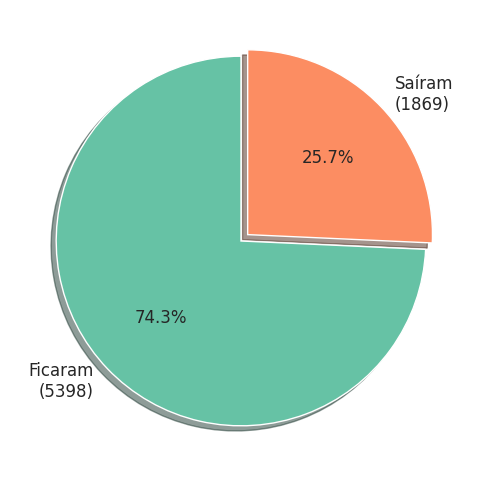

In [167]:
contagem_evasao = df['Evasão'].value_counts()

ficaram = contagem_evasao[0]
sairam = contagem_evasao[1]
total = contagem_evasao.sum()

cores_seaborn = sns.color_palette('Set2')

plt.figure(figsize=(6, 6))

plt.pie(contagem_evasao,
        labels=[f'Ficaram\n({ficaram})', f'Saíram\n({sairam})'],
        autopct='%1.1f%%',
        colors=cores_seaborn,
        startangle=90,
        explode=(0, 0.05),
        shadow=True,
        textprops={'fontsize': 12})

plt.show()

In [168]:
medias_por_evasao = df.groupby('Evasão')[['Meses na Empresa', 'Valor Mensal', 'Valor por dia']].mean().reset_index()
medias_por_evasao['Evasão'] = medias_por_evasao['Evasão'].map({1: 'Sim', 0: 'Não'})
media_evasao_estilizada = medias_por_evasao.style.hide(axis='index').format({
    'Meses na Empresa':'{:.1f}',
    'Valor Mensal':'R${:.2F}',
    'Valor por dia':'R${:.2F}'
})
media_evasao_estilizada

Evasão,Meses na Empresa,Valor Mensal,Valor por dia
Não,37.3,R$61.35,R$2.05
Sim,18.0,R$74.44,R$2.48


In [169]:
evasao_por_idade = df.groupby('Idoso')['Evasão'].mean().reset_index()
evasao_por_idade['Evasão'] = (evasao_por_idade['Evasão'] * 100).round(2)
evasao_por_idade['Idoso'] = evasao_por_idade['Idoso'].map({1: 'Sim', 0: 'Não'})
evasao_por_idade.rename(columns={'Evasão': 'Taxa de Evasão Aproximada'}, inplace=True)
evasao_por_idade.style.hide(axis='index').format({'Taxa de Evasão Aproximada':'{:.2f}%'})\
                                 .bar(subset='Taxa de Evasão Aproximada', vmin=0, vmax=50.0, height=50, width=60, color='red')

Idoso,Taxa de Evasão Aproximada
Não,22.89%
Sim,40.27%


In [170]:
evasao_por_contrato = df.groupby('Tipo de Contrato')['Evasão'].mean().reset_index()
evasao_por_contrato['Evasão'] = (evasao_por_contrato['Evasão'] * 100).round(2)
evasao_por_contrato.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)
evasao_por_contrato.style.hide(axis='index').format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                                 .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

Tipo de Contrato,Taxa de Evasão Aproximada(%)
Anual,10.93%
Bianual,2.75%
Mensal,41.32%


In [171]:
df_internet = df.groupby('Serviço de Internet')['Evasão'].mean().reset_index()
df_internet['Evasão'] = (df_internet['Evasão'] * 100).round(2)
df_internet.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

df_internet.style.hide(axis='index').format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                                 .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')


Serviço de Internet,Taxa de Evasão Aproximada(%)
0,7.15%
DSL,18.45%
Fibra otica,40.56%


In [172]:
df_tempo = df.groupby('Tempo de contrato')['Evasão'].mean().reset_index()
df_tempo['Evasão'] = (df_tempo['Evasão'] * 100).round(2)
df_tempo.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

df_tempo.style.hide(axis='index').format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                                 .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

/tmp/ipython-input-1118/1789843583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tempo = df.groupby('Tempo de contrato')['Evasão'].mean().reset_index()


Tempo de contrato,Taxa de Evasão Aproximada(%)
0-1 Ano,46.55%
1-2 Anos,28.91%
2-3 Anos,21.26%
3-4 Anos,19.01%
4-5 Anos,14.50%
Mais de 5 Anos,6.48%


In [173]:
print("\n--- Distribuição por Tipo de Contrato ---")
display(df['Tipo de Contrato'].value_counts(normalize=True).round(4) * 100)


--- Distribuição por Tipo de Contrato ---


,proportion
Tipo de Contrato,
Mensal,55.11
Bianual,23.99
Anual,20.90


In [174]:
evasao_pagamento = df.groupby(['Método de Pagamento', ])['Evasão'].mean().reset_index()
evasao_pagamento['Evasão'] = (evasao_pagamento['Evasão'] * 100).round(2)
evasao_pagamento.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

evasao_pagamento.sort_values(by='Taxa de Evasão Aproximada(%)', ascending=False).style.hide(axis='index')\
                .format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

Método de Pagamento,Taxa de Evasão Aproximada(%)
Cheque eletrônico,43.80%
Cheque por correio,18.50%
Transferência bancária (automática),16.24%
Cartão de crédito (automático),14.80%


In [175]:
evasao_parceiro = df.groupby('Parceiro')['Evasão'].mean().reset_index()
evasao_parceiro['Evasão'] = (evasao_parceiro['Evasão'] * 100).round(2)
evasao_parceiro['Parceiro'] = evasao_parceiro['Parceiro'].map({1: 'Sim', 0: 'Não'})
evasao_parceiro.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

evasao_parceiro.sort_values(by='Taxa de Evasão Aproximada(%)', ascending=False).style.hide(axis='index')\
                .format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

Parceiro,Taxa de Evasão Aproximada(%)
Não,32.01%
Sim,19.02%


In [176]:
evasao_dependentes = df.groupby('Dependentes')['Evasão'].mean().reset_index()
evasao_dependentes['Evasão'] = (evasao_dependentes['Evasão'] * 100).round(2)
evasao_dependentes['Dependentes'] = evasao_dependentes['Dependentes'].map({1: 'Sim', 0: 'Não'})
evasao_dependentes.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

evasao_dependentes.sort_values(by='Taxa de Evasão Aproximada(%)', ascending=False).style.hide(axis='index')\
                .format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

Dependentes,Taxa de Evasão Aproximada(%)
Não,30.34%
Sim,14.95%


In [177]:
evasao_genero = df.groupby('Gênero')['Evasão'].mean().reset_index()
evasao_genero['Evasão'] = (evasao_genero['Evasão'] * 100).round(2)
evasao_genero.rename(columns={'Evasão': 'Taxa de Evasão Aproximada(%)'}, inplace=True)

evasao_genero.sort_values(by='Taxa de Evasão Aproximada(%)', ascending=False).style.hide(axis='index')\
                .format({'Taxa de Evasão Aproximada(%)':'{:.2f}%'})\
                .bar(subset='Taxa de Evasão Aproximada(%)', vmin=0, vmax=50.0, height=50, width=60, color='red')

Gênero,Taxa de Evasão Aproximada(%)
Feminino,26.14%
Masculino,25.31%


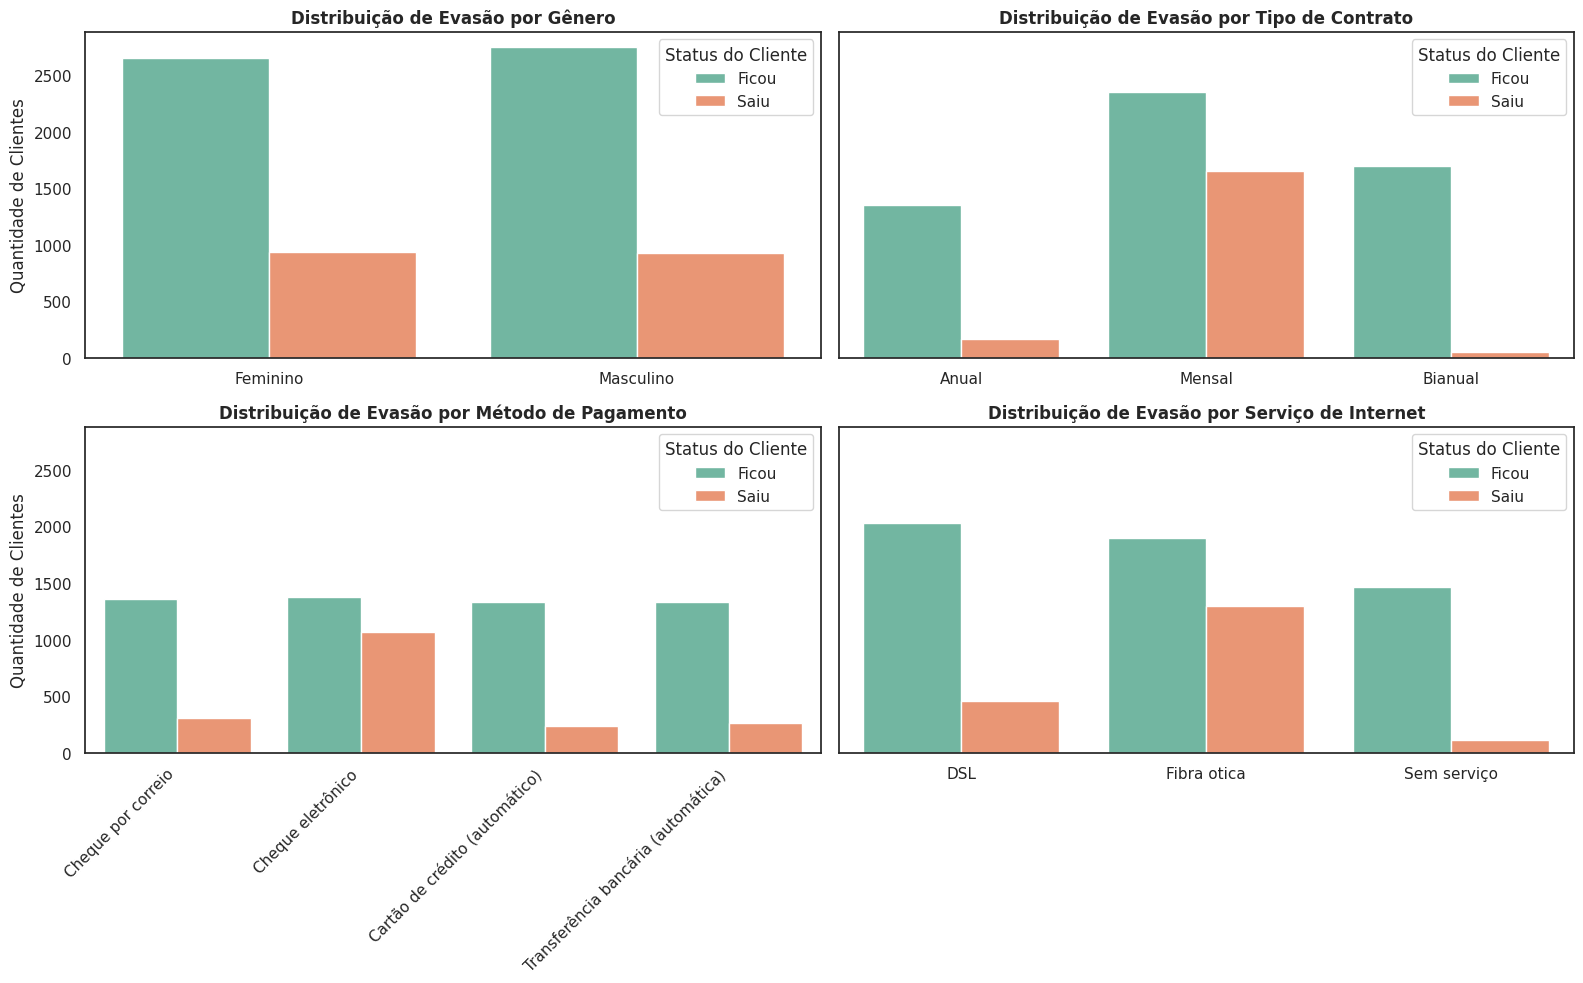

In [178]:
colunas_cat = ['Gênero', 'Tipo de Contrato', 'Método de Pagamento', 'Serviço de Internet']

df_plot = df.copy()
df_plot['Evasão'] = df_plot['Evasão'].map({0: 'Ficou', 1: 'Saiu'})
df_plot['Serviço de Internet'] = df_plot['Serviço de Internet'].replace({0: 'Sem serviço', '0': 'Sem serviço'})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, coluna in enumerate(colunas_cat):
    sns.countplot(data=df_plot, x=coluna, hue='Evasão', palette='Set2', ax=axes[i])

    axes[i].set_title(f'Distribuição de Evasão por {coluna}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')

    if i % 2 == 0:
        axes[i].set_ylabel('Quantidade de Clientes')
    else:
        axes[i].set_ylabel('')

    axes[i].legend(title='Status do Cliente')

    if coluna == 'Método de Pagamento':
        for label in axes[i].get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')

plt.tight_layout()
plt.show()

/tmp/ipython-input-1118/2924060491.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_evadiu, y=coluna, order=ordem, palette='Reds_r', ax=axes[i])
/tmp/ipython-input-1118/2924060491.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_evadiu, y=coluna, order=ordem, palette='Reds_r', ax=axes[i])
/tmp/ipython-input-1118/2924060491.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_evadiu, y=coluna, order=ordem, palette='Reds_r', ax=axes[i])
/tmp/ipython-input-1118/2924060491.py:12: FutureWarning: 

Passing `pa

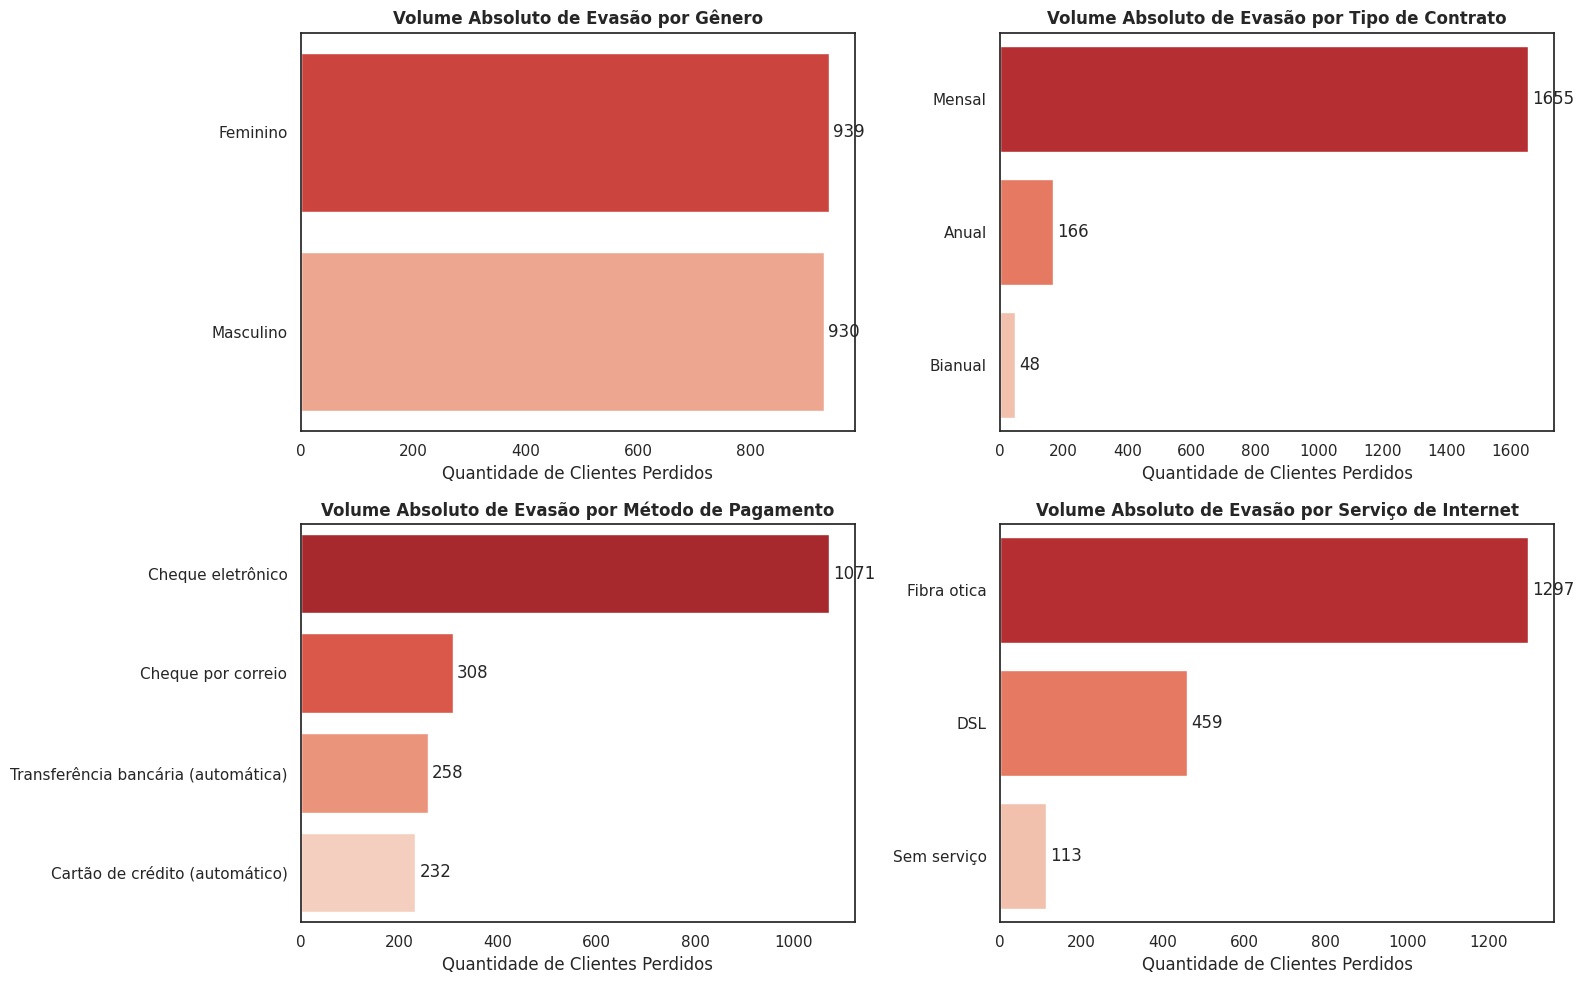

In [179]:
df_evadiu = df[df['Evasão'] == 1].copy()
df_evadiu['Serviço de Internet'] = df_evadiu['Serviço de Internet'].replace({0: 'Sem serviço', '0': 'Sem serviço'})

colunas_cat = ['Gênero', 'Tipo de Contrato', 'Método de Pagamento', 'Serviço de Internet']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

for i, coluna in enumerate(colunas_cat):
    ordem = df_evadiu[coluna].value_counts().index

    sns.countplot(data=df_evadiu, y=coluna, order=ordem, palette='Reds_r', ax=axes[i])

    axes[i].set_title(f'Volume Absoluto de Evasão por {coluna}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Quantidade de Clientes Perdidos')
    axes[i].set_ylabel('')

    for container in axes[i].containers:
        axes[i].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1118/541287308.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=contagem_perfis, x='Quantidade de Evasões', y='Perfil do Cliente', palette='Reds_r')


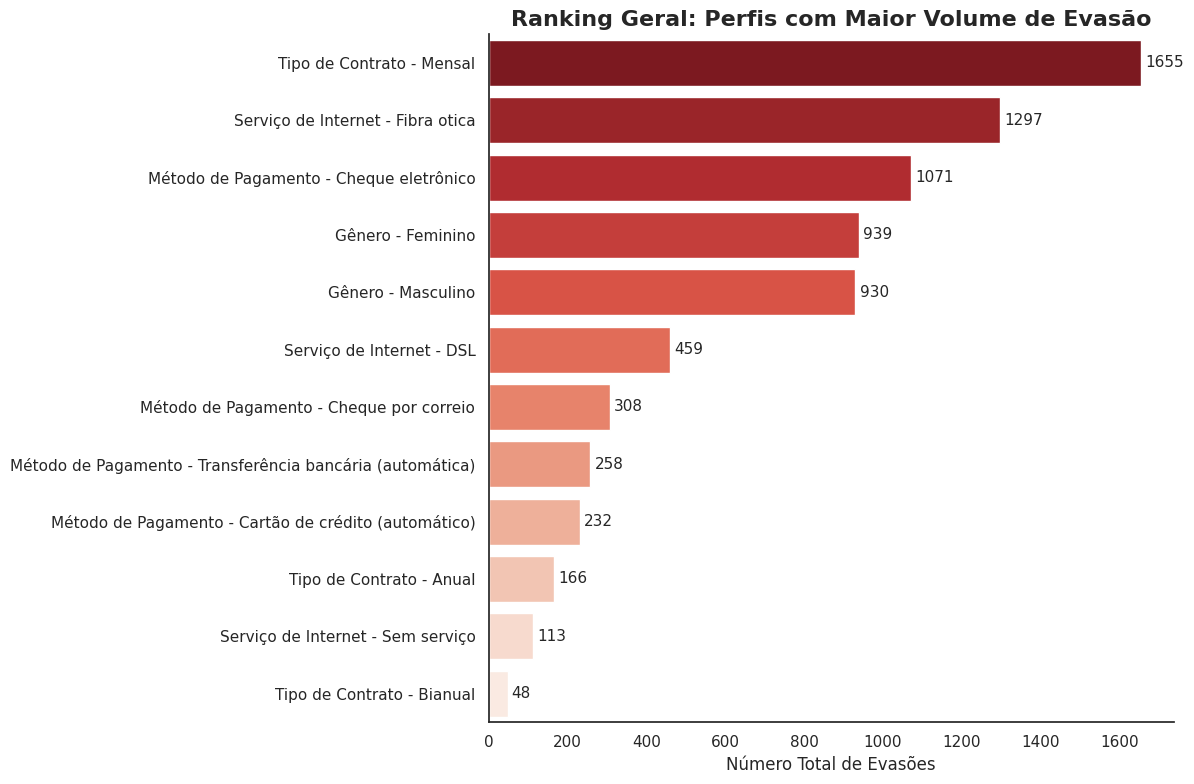

In [180]:
# 1. Filtrar apenas os clientes que evadiram
df_evadiu = df[df['Evasão'] == 1].copy()

# Tratando aquele '0' do Serviço de Internet
df_evadiu['Serviço de Internet'] = df_evadiu['Serviço de Internet'].replace({0: 'Sem serviço', '0': 'Sem serviço'})

# 2. Variáveis que queremos unificar
colunas_cat = ['Gênero', 'Tipo de Contrato', 'Método de Pagamento', 'Serviço de Internet']

# 3. A Mágica do Pandas: Derreter o DataFrame
# Isso transforma as várias colunas em duas: 'Variável' (ex: Gênero) e 'Valor' (ex: Feminino)
df_melt = df_evadiu.melt(value_vars=colunas_cat, var_name='Variável', value_name='Valor')

# Criar uma coluna com o nome completo do perfil para ficar bonito no Eixo Y
df_melt['Perfil'] = df_melt['Variável'] + " - " + df_melt['Valor'].astype(str)

# Contar as ocorrências de cada perfil e já criar uma tabela ordenada
contagem_perfis = df_melt['Perfil'].value_counts().reset_index()
contagem_perfis.columns = ['Perfil do Cliente', 'Quantidade de Evasões']

# 4. Criar o Gráfico Único
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=contagem_perfis, x='Quantidade de Evasões', y='Perfil do Cliente', palette='Reds_r')

# Estilização
plt.title('Ranking Geral: Perfis com Maior Volume de Evasão', fontsize=16, fontweight='bold')
plt.xlabel('Número Total de Evasões', fontsize=12)
plt.ylabel('') # Deixamos vazio pois os rótulos já explicam

# Adicionar os rótulos de dados (números) na ponta de cada barra
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

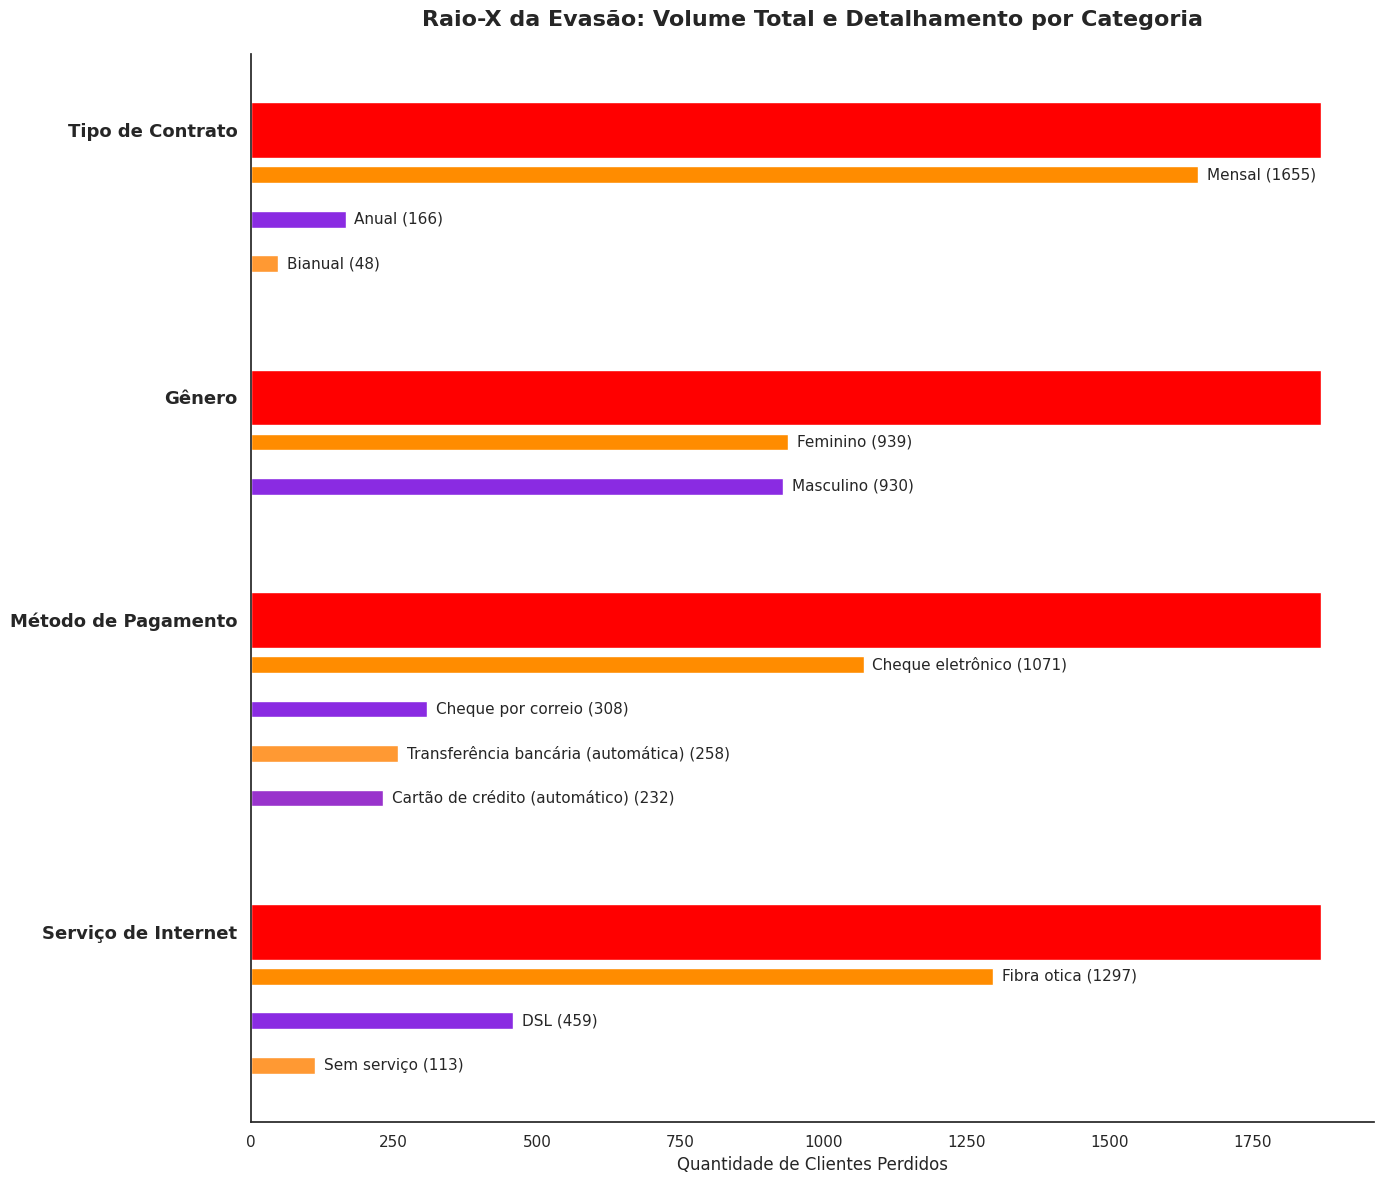

In [181]:
df_evadiu = df[df['Evasão'] == 1].copy()

if 'Serviço de Internet' in df_evadiu.columns:
    df_evadiu['Serviço de Internet'] = df_evadiu['Serviço de Internet'].replace({0: 'Sem serviço', '0': 'Sem serviço'})

colunas_cat = ['Tipo de Contrato', 'Gênero', 'Método de Pagamento', 'Serviço de Internet']
total_evasao = len(df_evadiu)

fig, ax = plt.subplots(figsize=(14, 12))

y_ticks = []
y_labels = []
current_y = 0

cores_sub = ['#FF8C00', '#8A2BE2', '#FF9933', '#9933CC']

for coluna in colunas_cat:
    ax.barh(current_y, total_evasao, height=0.5, color='#FF0000')
    y_ticks.append(current_y)
    y_labels.append(f'{coluna}')

    contagens = df_evadiu[coluna].value_counts()

    for i, (subcat, qtd) in enumerate(contagens.items()):
        current_y += 0.4
        cor = cores_sub[i % len(cores_sub)]
        ax.barh(current_y, qtd, height=0.15, color=cor)
        ax.text(qtd + 15, current_y, f'{subcat} ({qtd})', va='center', ha='left', fontsize=11)

    current_y += 1.2

ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=13, fontweight='bold')
ax.invert_yaxis()

plt.title('Raio-X da Evasão: Volume Total e Detalhamento por Categoria', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Quantidade de Clientes Perdidos', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

/tmp/ipython-input-1118/1120169501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasão', y=coluna, palette='Set2', ax=axes[0, i])
/tmp/ipython-input-1118/1120169501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasão', y=coluna, palette='Set2', ax=axes[0, i])
/tmp/ipython-input-1118/1120169501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Evasão', y=coluna, palette='Set2', ax=axes[0, i])


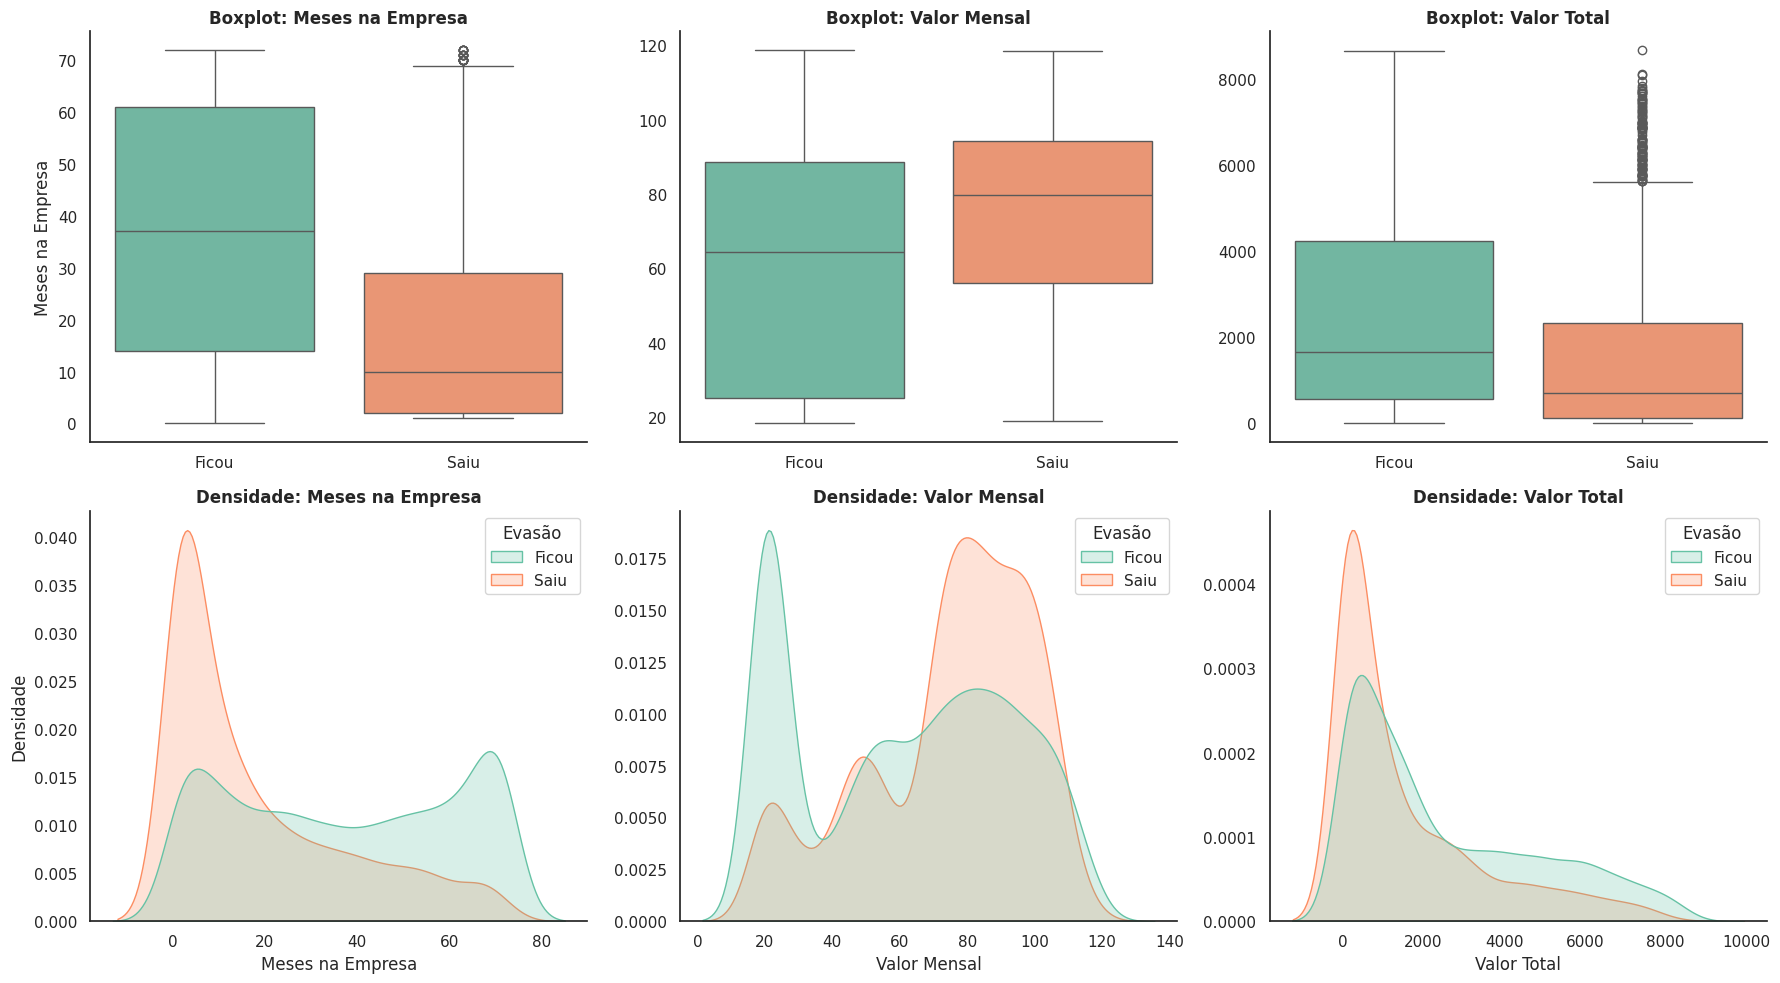

In [182]:
colunas_num = ['Meses na Empresa', 'Valor Mensal', 'Valor Total']

fig, axes = plt.subplots(nrows=2, ncols=len(colunas_num), figsize=(18, 10))

for i, coluna in enumerate(colunas_num):
    sns.boxplot(data=df_plot, x='Evasão', y=coluna, palette='Set2', ax=axes[0, i])
    axes[0, i].set_title(f'Boxplot: {coluna}', fontsize=12, fontweight='bold')
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel(coluna if i == 0 else '')

    sns.kdeplot(data=df_plot, x=coluna, hue='Evasão', fill=True, common_norm=False, palette='Set2', ax=axes[1, i])
    axes[1, i].set_title(f'Densidade: {coluna}', fontsize=12, fontweight='bold')
    axes[1, i].set_xlabel(coluna)
    axes[1, i].set_ylabel('Densidade' if i == 0 else '')

sns.despine()
plt.tight_layout()
plt.show()

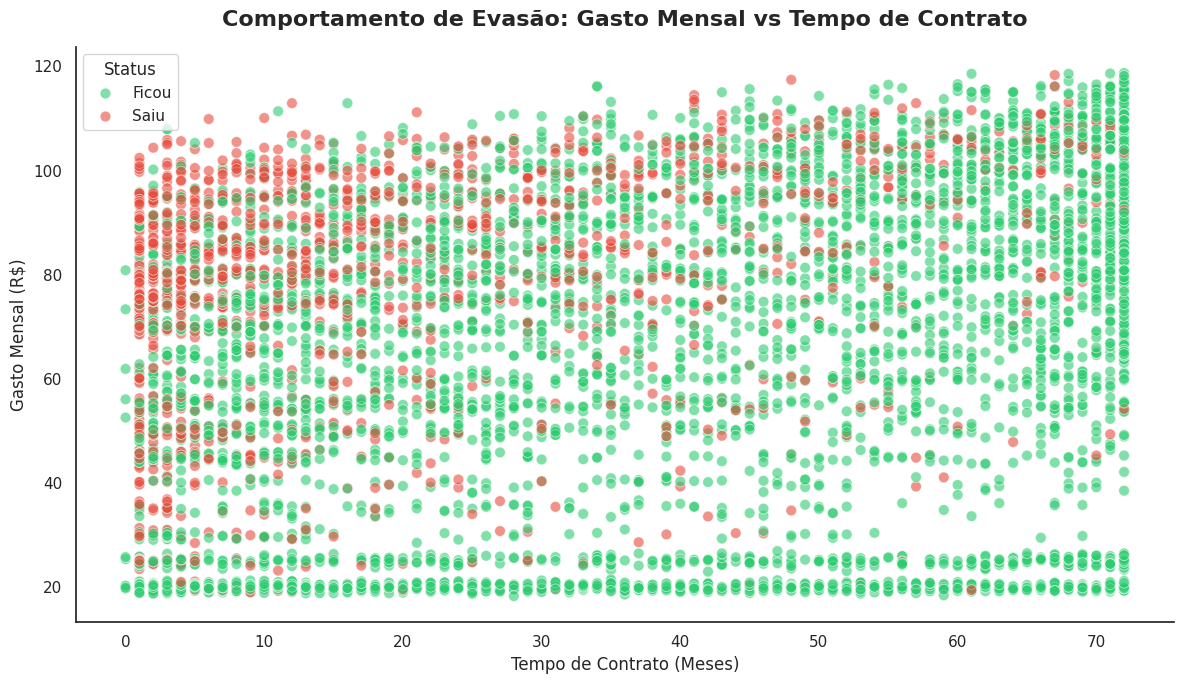

In [183]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.scatterplot(data=df_plot,
                x='Meses na Empresa',
                y='Valor Mensal',
                hue='Evasão',
                palette={'Ficou': '#2ecc71', 'Saiu': '#e74c3c'},
                alpha=0.6,
                s=60,
                ax=ax)

plt.title('Comportamento de Evasão: Gasto Mensal vs Tempo de Contrato', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Gasto Mensal (R$)', fontsize=12)

ax.legend(title='Status')

sns.despine()
plt.tight_layout()
plt.show()

In [184]:
colunas_servicos = [
    'Serviço de Telefone', 'Múltiplas Linhas', 'Segurança Online',
    'Backup Online', 'Proteção Dispositivo', 'Suporte Técnico',
    'Streaming TV', 'Streaming Filmes'
]

df['Quantidade de Serviços'] = df[colunas_servicos].sum(axis=1)

colunas_para_correlacao = [
    'Valor por dia', 'Quantidade de Serviços',
    'Valor Mensal', 'Valor Total',
    'Meses na Empresa', 'Evasão'
]

matriz_correlacao = df[colunas_para_correlacao].corr()
display(matriz_correlacao)

,Valor por dia,Quantidade de Serviços,Valor Mensal,Valor Total,Meses na Empresa,Evasão
Valor por dia,1.000000,0.802686,0.999996,0.652225,0.247992,0.189918
Quantidade de Serviços,0.802686,1.000000,0.802709,0.797138,0.523853,-0.064642
Valor Mensal,0.999996,0.802709,1.000000,0.652211,0.247982,0.189866
Valor Total,0.652225,0.797138,0.652211,1.000000,0.825407,-0.193345
Meses na Empresa,0.247992,0.523853,0.247982,0.825407,1.000000,-0.344079
Evasão,0.189918,-0.064642,0.189866,-0.193345,-0.344079,1.000000


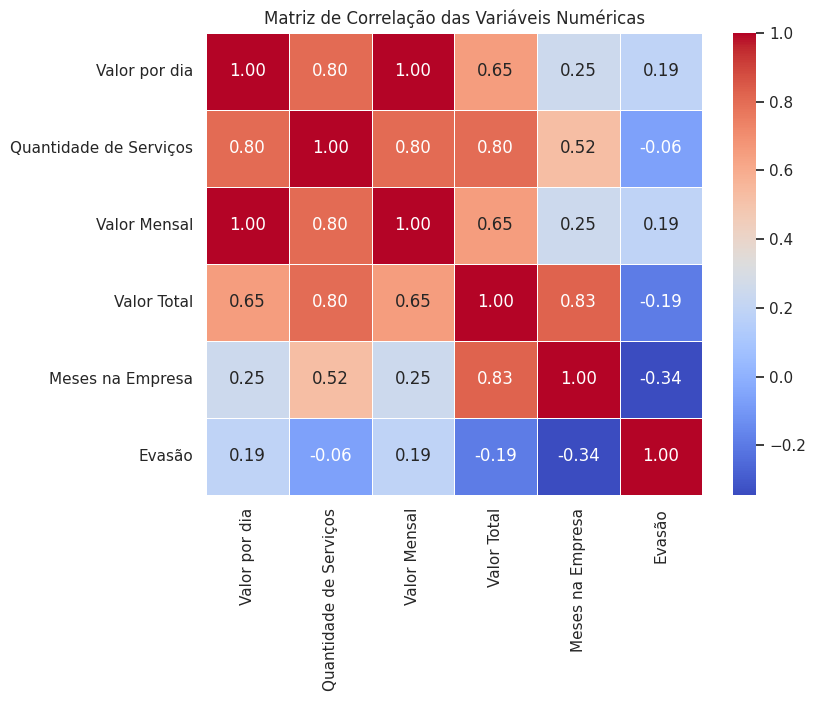

In [185]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

/tmp/ipython-input-1118/4121612582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasão', y='Valor por dia', data=df, palette='Set2')


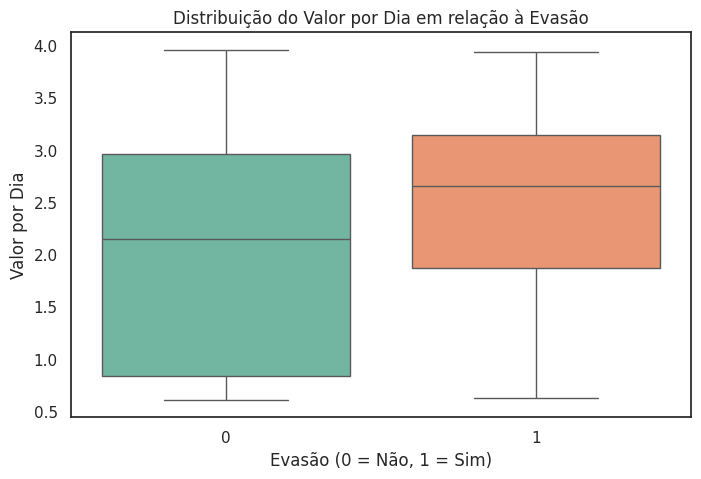

In [186]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Evasão', y='Valor por dia', data=df, palette='Set2')
plt.title('Distribuição do Valor por Dia em relação à Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Valor por Dia')
plt.show()

/tmp/ipython-input-1118/370355299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantidade de Serviços', y='Evasão', data=df, palette='viridis', errorbar=None)


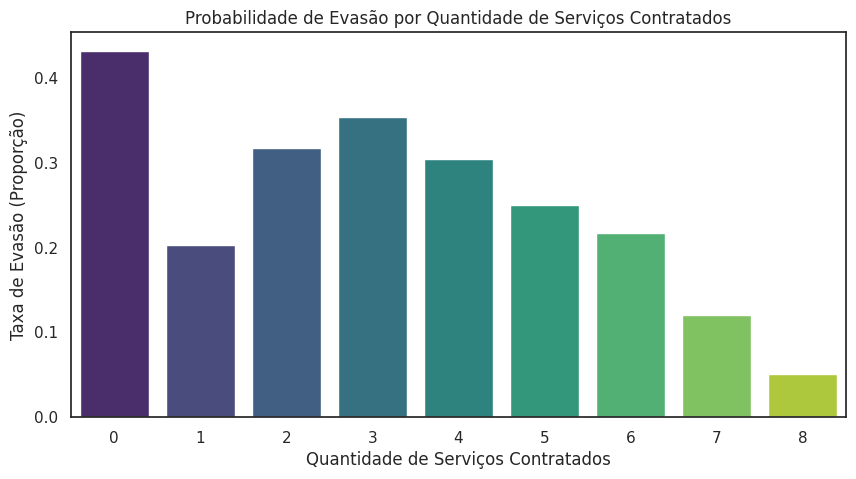

In [187]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quantidade de Serviços', y='Evasão', data=df, palette='viridis', errorbar=None)
plt.title('Probabilidade de Evasão por Quantidade de Serviços Contratados')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Taxa de Evasão (Proporção)')
plt.show()

#📄Relatorio Final

# 📊 Relatório Final: Análise de Evasão de Clientes - TelecomX

## 1. Introdução
O presente projeto teve como principal objetivo analisar os dados de clientes da operadora de telecomunicações **TelecomX** para compreender os principais fatores que levam à evasão de clientes. Reter um cliente atual é financeiramente mais vantajoso do que adquirir um novo, tornando essa análise estratégica para a redução de custos e aumento de receita da companhia.

## 2. Limpeza e Tratamento de Dados
Para garantir a confiabilidade da análise, os dados brutos passaram por um processo estruturado de limpeza:
* Extração de dados em JSON via API e normalização com a biblioteca Pandas.
* Identificação e correção de valores em branco na coluna `Valor Total`, preenchidos com `0`.
* Remoção da coluna `customerID`, pois não agrega valor a modelos analíticos.
* Tradução das colunas e dos registros categóricos para o português, além do mapeamento das respostas para numéricos binários (1 = Sim, 0 = Nao).
* **Engenharia de Recursos (Feature Engineering):** Criação das variáveis `Valor por dia` e `Quantidade de Serviços`.

## 3. Análise Exploratória de Dados (EDA)

### 3.1 Visão Geral da Evasão
Para dimensionar o problema, começamos avaliando a proporção total de clientes que deixaram a empresa em relação à nossa base ativa.

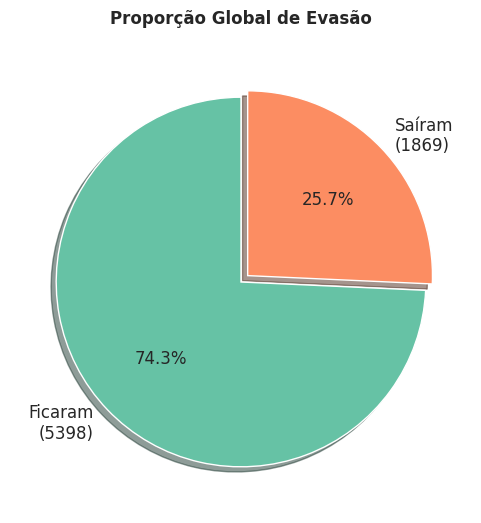

In [188]:
contagem_evasao = df['Evasão'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(contagem_evasao,
        labels=[f'Ficaram\n({contagem_evasao[0]})', f'Saíram\n({contagem_evasao[1]})'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=90,
        explode=(0, 0.05),
        shadow=True,
        textprops={'fontsize': 12})
plt.title('Proporção Global de Evasão', fontweight='bold', pad=20)
plt.show()

### 3.2 O Perfil do Cliente que Evade
Mapeamos as características demográficas e de contrato para entender quem é o cliente que cancela. O ranking abaixo destaca os perfis com maior volume absoluto de evasão.

/tmp/ipython-input-1118/3955634382.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=contagem_perfis.head(10), x='Quantidade de Evasões', y='Perfil do Cliente', palette='Reds_r')


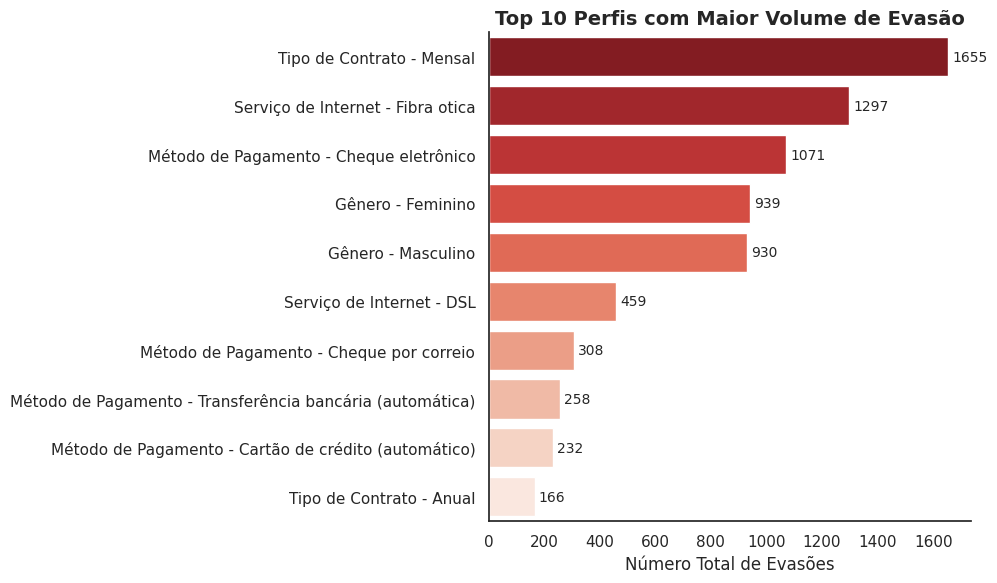

In [189]:
df_evadiu = df[df['Evasão'] == 1].copy()
if 'Serviço de Internet' in df_evadiu.columns:
    df_evadiu['Serviço de Internet'] = df_evadiu['Serviço de Internet'].replace({0: 'Sem serviço', '0': 'Sem serviço'})

colunas_cat = ['Gênero', 'Tipo de Contrato', 'Método de Pagamento', 'Serviço de Internet']
df_melt = df_evadiu.melt(value_vars=colunas_cat, var_name='Variável', value_name='Valor')
df_melt['Perfil'] = df_melt['Variável'] + " - " + df_melt['Valor'].astype(str)

contagem_perfis = df_melt['Perfil'].value_counts().reset_index()
contagem_perfis.columns = ['Perfil do Cliente', 'Quantidade de Evasões']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=contagem_perfis.head(10), x='Quantidade de Evasões', y='Perfil do Cliente', palette='Reds_r')
plt.title('Top 10 Perfis com Maior Volume de Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Número Total de Evasões')
plt.ylabel('')
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10)
sns.despine()
plt.tight_layout()
plt.show()

### 3.3 Correlação e Comportamento Financeiro
Para entender o peso do tempo de empresa e do valor gasto, primeiro analisamos a matriz de correlação geral e, em seguida, cruzamos essas informações visuais para identificar zonas de risco.

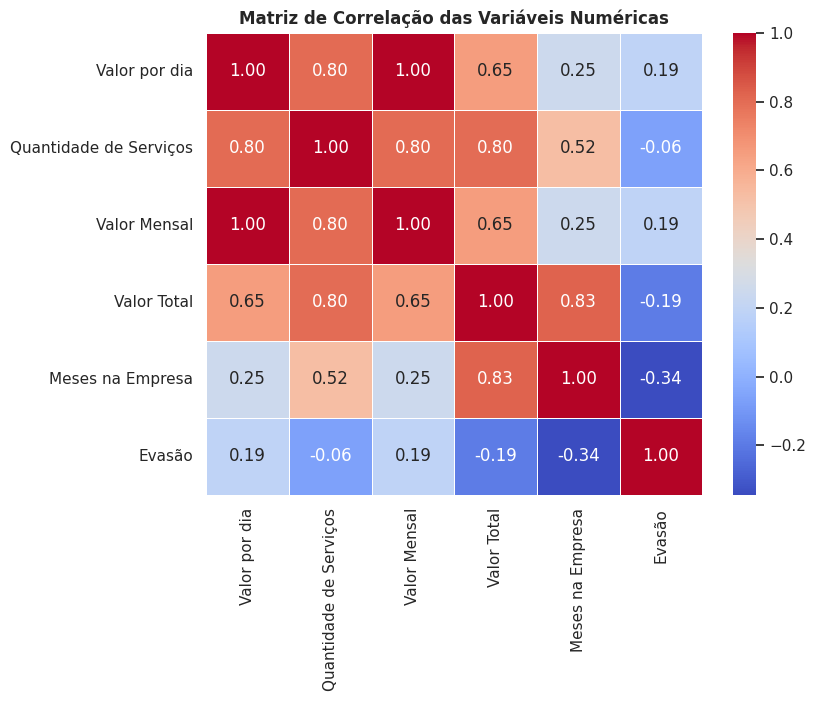

In [190]:
colunas_para_correlacao = ['Valor por dia', 'Quantidade de Serviços', 'Valor Mensal', 'Valor Total', 'Meses na Empresa', 'Evasão']
matriz_correlacao = df[colunas_para_correlacao].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas', fontweight='bold')
plt.show()

/tmp/ipython-input-1118/2215796056.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasão', y='Valor por dia', data=df, palette='Set2', ax=axes[1])


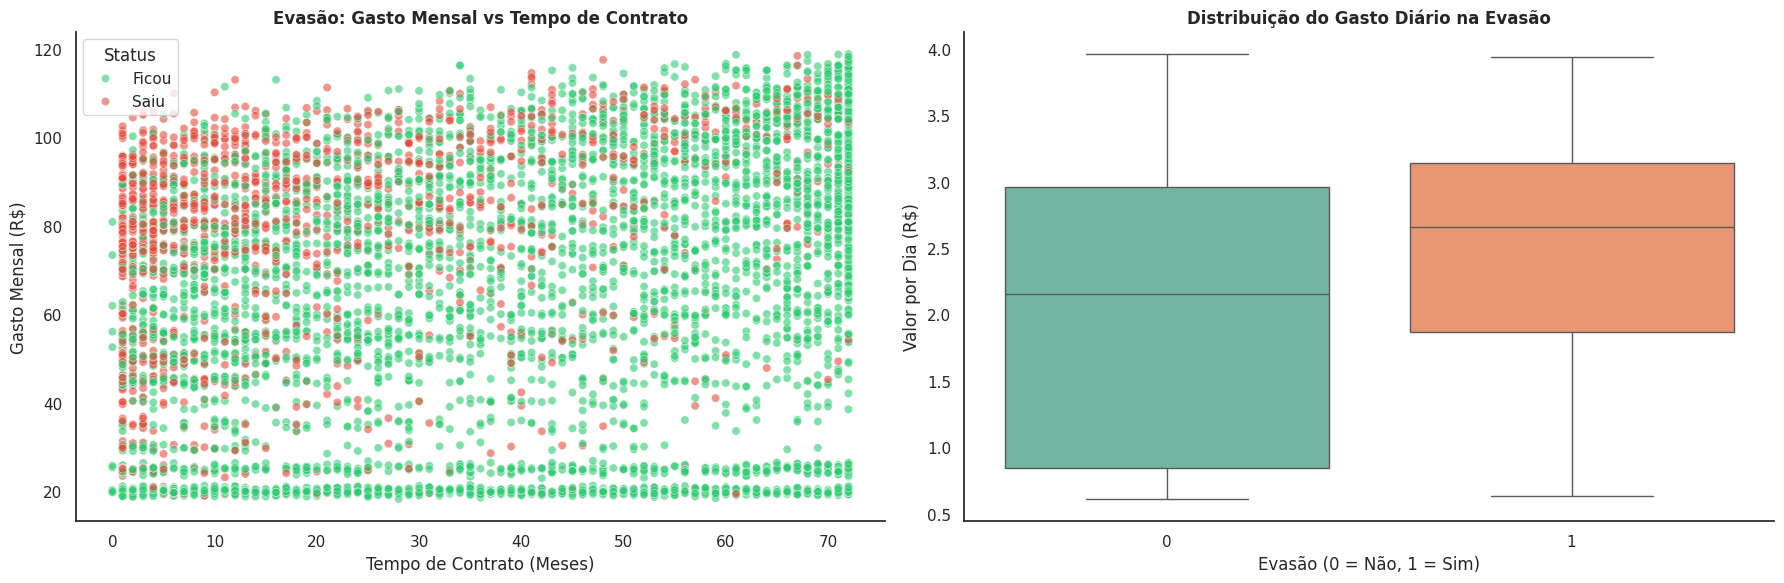

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Scatterplot (Tempo vs Gasto)
df_plot = df.copy()
df_plot['Status'] = df_plot['Evasão'].map({0: 'Ficou', 1: 'Saiu'})
sns.scatterplot(data=df_plot, x='Meses na Empresa', y='Valor Mensal', hue='Status',
                palette={'Ficou': '#2ecc71', 'Saiu': '#e74c3c'}, alpha=0.6, ax=axes[0])
axes[0].set_title('Evasão: Gasto Mensal vs Tempo de Contrato', fontweight='bold')
axes[0].set_xlabel('Tempo de Contrato (Meses)')
axes[0].set_ylabel('Gasto Mensal (R$)')

# Gráfico 2: Boxplot (Valor por dia)
sns.boxplot(x='Evasão', y='Valor por dia', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Distribuição do Gasto Diário na Evasão', fontweight='bold')
axes[1].set_xlabel('Evasão (0 = Não, 1 = Sim)')
axes[1].set_ylabel('Valor por Dia (R$)')

sns.despine()
plt.tight_layout()
plt.show()

### 3.4 O Poder do Ecossistema de Serviços
Por fim, verificamos como a contratação de múltiplos serviços adicionais (como segurança, backup, streaming) impacta a retenção do usuário.

/tmp/ipython-input-1118/3010612839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantidade de Serviços', y='Evasão', data=df, palette='viridis', errorbar=None)


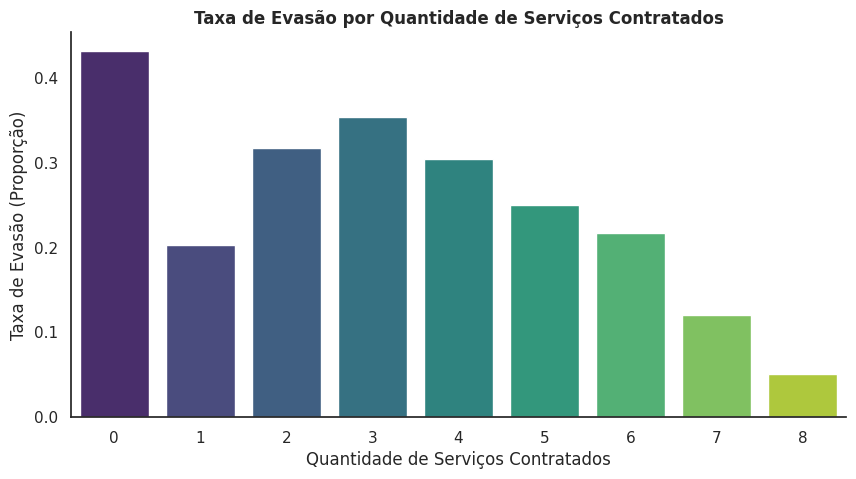

In [192]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Quantidade de Serviços', y='Evasão', data=df, palette='viridis', errorbar=None)
plt.title('Taxa de Evasão por Quantidade de Serviços Contratados', fontweight='bold')
plt.xlabel('Quantidade de Serviços Contratados')
plt.ylabel('Taxa de Evasão (Proporção)')
sns.despine()
plt.show()

## 4. Conclusões e Insights
A jornada analítica revelou comportamentos muito claros sobre a nossa base:
1. **Taxa Preocupante e Perfil de Risco:** Atualmente, 26,5% da nossa base cancelou os serviços. Clientes com *Contrato Mensal*, internet de *Fibra Ótica* e pagamento via *Cheque Eletrônico* compõem o topo do ranking absoluto de evasões.
2. **A Zona de Perigo (Dispersão):** O cruzamento de dados mostra que clientes novos (poucos meses de empresa) associados a mensalidades altas formam o maior aglomerado de evasão (pontos vermelhos no gráfico de dispersão). O Boxplot confirma que clientes que saem possuem uma mediana de gasto diário maior.
3. **O Poder do Ecossistema:** Existe uma forte correlação negativa entre serviços contratados e evasão. Clientes com 4 ou mais serviços extras possuem uma taxa de cancelamento baixíssima.

## 5. Recomendações Estratégicas
A TelecomX deve focar em políticas de retenção baseadas nestes achados:
* **Reformulação do Acolhimento (Onboarding):** Criar uma régua de relacionamento intensiva para clientes recém-chegados, especialmente os que assinam pacotes caros, pois eles têm alta propensão ao cancelamento nos primeiros meses.
* **Incentivo a Métodos Automáticos:** O Cheque Eletrônico tem alta evasão. Oferecer pequenos descontos na fatura para quem migrar para débito automático ou cartão de crédito pode diminuir o atrito do pagamento.
* **Campanhas de Combos (Venda Cruzada):** Vender pacotes conjuntos. Facilitar o acesso a serviços como Backup Online e Segurança Online aumenta a dependência do cliente em relação ao ecossistema da empresa, reduzindo drasticamente as taxas de abandono.